In [108]:
#CONTENTS LIST:
#1. Question 5- The marketing and business strategy units at Instacart want to create more-relevant marketing strategies for 
#   different products and are, thus, curious about customer profiling in their database. Create a profiling variable based 
#   on age, income, certain goods in the “department_id” column, and number of dependents. You might also use the 
#   “orders_day_of_week” and “order_hour_of_day” columns if you can think of a way they would impact customer profiles. 
#   (Hint: As an example, try thinking of what characteristics would lead you to the profile “Single adult” or “Young parent.”)
#  -create randomized sample 
#  -create income profiles consisting of income tiers
#  -create age groups 
#  -create crosstab of age groups and income profiles and visualize the results
#  -create dependents flag for customers who have dependents
#  -create customer profile variable from age groups and income tiers

#2. Question 6- Create an appropriate visualization to show the distribution of profiles
#  -create departments data dictionary to determine top departments
#  -create bar chart to visualize top 5 departments
#  -Determine top departments
#  -Determine departments preferences by customer profile
#  -Determine departments preferences by customer loyalty
#  -Determine departments preference by region
#  -Determine departments preference by family status

In [2]:
#Importing Libraries
import pandas as pd
import numpy as np
import os
import matplotlib.pyplot as plt
import seaborn as sns
import scipy

In [3]:
#Creating string for project folder path
path=r"C:\Users\HP\02-2024 Instacart Basket Analysis"

In [4]:
"""
File: insta_no_low_ords.pkl
Author:Erica Henry
Date: 3/4/24

#Description: Importing of insta_no_low_ords.pkl
"""
insta_no_low_ords=pd.read_pickle(os.path.join(path,"02 Data","Prepared Data","insta_no_low_ords.pkl"))

In [5]:
insta_no_low_ords.head()

,order_id,user_id,number_of_orders,orders_day_of_week,order_hour_of_day,days_since_prior_order,product_id,add_to_cart_order,number_of_times_reordered,product_name,...,Median Customer Frequency,Frequency flag,Gender,State,Age,number_of_dependents,fam_status,income,Region,low_activity_flag
1,2398795,1,2,3,7,15.0,196,1,1,Soda,...,20.5,Frequent customer,Female,Alabama,31,3,married,40423,South,False
2,473747,1,3,3,12,21.0,196,1,1,Soda,...,20.5,Frequent customer,Female,Alabama,31,3,married,40423,South,False
3,2254736,1,4,4,7,29.0,196,1,1,Soda,...,20.5,Frequent customer,Female,Alabama,31,3,married,40423,South,False
4,431534,1,5,4,15,28.0,196,1,1,Soda,...,20.5,Frequent customer,Female,Alabama,31,3,married,40423,South,False
5,3367565,1,6,2,7,19.0,196,1,1,Soda,...,20.5,Frequent customer,Female,Alabama,31,3,married,40423,South,False


In [6]:
"""
File: insta_no_low_ords.pkl
Author:Erica Henry
Date: 3/4/24

#Description: Question 5-The marketing and business strategy units at Instacart want to create more-relevant marketing strategies for different products and are, thus, curious about customer profiling in their database. Create a profiling variable based on age, income, certain goods in the “department_id” column, and number of dependents. You might also use the “orders_day_of_week” and “order_hour_of_day” columns if you can think of a way they would impact customer profiles. (Hint: As an example, try thinking of what characteristics would lead you to the profile “Single adult” or “Young parent.”
"""

column_names = list(insta_no_low_ords)

In [7]:
column_names

['order_id',
 'user_id',
 'number_of_orders',
 'orders_day_of_week',
 'order_hour_of_day',
 'days_since_prior_order',
 'product_id',
 'add_to_cart_order',
 'number_of_times_reordered',
 'product_name',
 'aisle_id',
 'department_id',
 'prices',
 'price_range_loc',
 'busiest_day',
 'busiest_days',
 'busiest_period_of_day',
 'max_order',
 'loyalty_flag',
 'Average Spending',
 'Spending_flag',
 'Median Customer Frequency',
 'Frequency flag',
 'Gender',
 'State',
 'Age',
 'number_of_dependents',
 'fam_status',
 'income',
 'Region',
 'low_activity_flag']

In [8]:
#Prepare to create sample
columns_for_sample = ['order_id',
 'user_id',
 'number_of_orders',
 'orders_day_of_week',
 'order_hour_of_day',
 'days_since_prior_order',
 'product_id',
 'add_to_cart_order',
 'number_of_times_reordered',
 'product_name',
 'aisle_id',
 'department_id',
 'prices',
 'price_range_loc',
 'busiest_day',
 'busiest_days',
 'busiest_period_of_day',
 'max_order',
 'loyalty_flag',
 'Average Spending',
 'Spending_flag',
 'Median Customer Frequency',
 'Frequency flag',
 'Gender',
 'State',
 'Age',
 'number_of_dependents',
 'fam_status',
 'income',
 'Region',
 'low_activity_flag']

In [9]:
sample_profile_subset = insta_no_low_ords[columns_for_sample]

In [10]:
#Export sample_profile_subset
sample_profile_subset.to_pickle(os.path.join(path, '02 Data','Prepared Data', 'sample_profile_subset.pkl'))

In [11]:
#Check output
sample_profile_subset.head()

,order_id,user_id,number_of_orders,orders_day_of_week,order_hour_of_day,days_since_prior_order,product_id,add_to_cart_order,number_of_times_reordered,product_name,...,Median Customer Frequency,Frequency flag,Gender,State,Age,number_of_dependents,fam_status,income,Region,low_activity_flag
1,2398795,1,2,3,7,15.0,196,1,1,Soda,...,20.5,Frequent customer,Female,Alabama,31,3,married,40423,South,False
2,473747,1,3,3,12,21.0,196,1,1,Soda,...,20.5,Frequent customer,Female,Alabama,31,3,married,40423,South,False
3,2254736,1,4,4,7,29.0,196,1,1,Soda,...,20.5,Frequent customer,Female,Alabama,31,3,married,40423,South,False
4,431534,1,5,4,15,28.0,196,1,1,Soda,...,20.5,Frequent customer,Female,Alabama,31,3,married,40423,South,False
5,3367565,1,6,2,7,19.0,196,1,1,Soda,...,20.5,Frequent customer,Female,Alabama,31,3,married,40423,South,False


In [12]:
sample_profile_subset.shape

(29303281, 31)

In [13]:
#Check 'Age' column output
sample_profile_subset['Age'].value_counts(dropna=False)

Age
79    481628
49    481404
48    480680
31    479755
64    478303
       ...  
60    436562
36    436237
66    429647
41    425991
25    424741
Name: count, Length: 64, dtype: int64

In [14]:
#Check 'income' column output
sample_profile_subset['income'].value_counts(dropna=False)

income
72344     4298
112610    4137
57501     4085
115620    3774
36163     3595
          ... 
48493        4
35538        4
90002        4
27364        4
147660       1
Name: count, Length: 96069, dtype: int64

In [15]:
#Create sample
profile_sample = np.random.rand(len(sample_profile_subset)) <= 0.7

In [16]:
#Store 70% of sample in df Big
big = sample_profile_subset[profile_sample]

In [17]:
#Store 30% of sample in df small
small = sample_profile_subset[~profile_sample]

In [18]:
len(big) + len(small)

29303281

In [21]:
len(small)

8790247

In [22]:
#Export randomized sample, small
small.to_pickle(os.path.join(path, '02 Data','Prepared Data', 'small_randomized_profile_sample.pkl'))

In [23]:
"""
File: small_randomized_profile_sample.pkl'
Author:Erica Henry
Date: 3/7/24

#Description: Create income profile column consisting of income tiers.
"""

small.loc[small['income'] <= 50000, 'income_profile'] = 'Low income'

C:\Users\HP\AppData\Local\Temp\ipykernel_3056\2399497785.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  small.loc[small['income'] <= 50000, 'income_profile'] = 'Low income'


In [24]:
small.loc[(small['income'] > 50000) & (small['income'] <= 200000), 'income_profile'] = 'Middle income'

In [25]:
small.loc[small['income'] > 200000, 'income_profile'] = 'High income'

In [26]:
small['income_profile'].value_counts(dropna=False)

income_profile
Middle income    7766824
Low income        950192
High income        73231
Name: count, dtype: int64

In [59]:
7766824+950192+73231

8790247

In [27]:
small.head()

,order_id,user_id,number_of_orders,orders_day_of_week,order_hour_of_day,days_since_prior_order,product_id,add_to_cart_order,number_of_times_reordered,product_name,...,Gender,State,Age,number_of_dependents,fam_status,income,Region,low_activity_flag,customer_profile,income_profile
2,473747,1,3,3,12,21.0,196,1,1,Soda,...,Female,Alabama,31,3,married,40423,South,False,Low income young adult,Low income
6,550135,1,7,1,9,20.0,196,1,1,Soda,...,Female,Alabama,31,3,married,40423,South,False,Low income young adult,Low income
8,2295261,1,9,1,16,0.0,196,4,1,Soda,...,Female,Alabama,31,3,married,40423,South,False,Low income young adult,Low income
17,550135,1,7,1,9,20.0,12427,3,1,Original Beef Jerky,...,Female,Alabama,31,3,married,40423,South,False,Low income young adult,Low income
19,2295261,1,9,1,16,0.0,12427,6,1,Original Beef Jerky,...,Female,Alabama,31,3,married,40423,South,False,Low income young adult,Low income


In [28]:
maxClm = small['Age'].max()
print(maxClm)

81


In [29]:
"""
File: small_randomized_profile_sample.pkl
Author:Erica Henry
Date: 3/4/24

#Description: Create age groups
"""

small.loc[(small["Age"] >= 18) & (small["Age"] <= 40), "Age_Groups_profile"] = 'Young Adult'

C:\Users\HP\AppData\Local\Temp\ipykernel_3056\729607781.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  small.loc[(small["Age"] >= 18) & (small["Age"] <= 40), "Age_Groups_profile"] = 'Young Adult'


In [30]:
small.loc[(small["Age"] > 40) & (small["Age"] <= 60), "Age_Groups_profile"] = 'Middle Age'

In [31]:
small.loc[(small["Age"] > 60) & (small["Age"] <= 81), "Age_Groups_profile"] = 'Senior'

In [32]:
small['Age_Groups_profile'].value_counts(dropna = False)

Age_Groups_profile
Young Adult    3165488
Senior         2870335
Middle Age     2754424
Name: count, dtype: int64

In [34]:
3165488+2870335+2754424

8790247

In [35]:
#In Age_Groups_loc young adults have the highest counts and Middle Age has the lowest

In [36]:
small.head()

,order_id,user_id,number_of_orders,orders_day_of_week,order_hour_of_day,days_since_prior_order,product_id,add_to_cart_order,number_of_times_reordered,product_name,...,State,Age,number_of_dependents,fam_status,income,Region,low_activity_flag,customer_profile,income_profile,Age_Groups_profile
2,473747,1,3,3,12,21.0,196,1,1,Soda,...,Alabama,31,3,married,40423,South,False,Low income young adult,Low income,Young Adult
6,550135,1,7,1,9,20.0,196,1,1,Soda,...,Alabama,31,3,married,40423,South,False,Low income young adult,Low income,Young Adult
8,2295261,1,9,1,16,0.0,196,4,1,Soda,...,Alabama,31,3,married,40423,South,False,Low income young adult,Low income,Young Adult
17,550135,1,7,1,9,20.0,12427,3,1,Original Beef Jerky,...,Alabama,31,3,married,40423,South,False,Low income young adult,Low income,Young Adult
19,2295261,1,9,1,16,0.0,12427,6,1,Original Beef Jerky,...,Alabama,31,3,married,40423,South,False,Low income young adult,Low income,Young Adult


In [37]:
"""
File: small_randomized_profile_sample.pkl'
Author:Erica Henry
Date: 3/7/24

#Description: Create crosstab of Age_Groups_loc and income_profile columns 
"""

age_income_profile = pd.crosstab(small['Age_Groups_profile'], small['income_profile'], dropna = False)

In [38]:
age_income_profile.to_clipboard()

In [39]:
age_income_profile.value_counts(dropna=False)

High income  Low income  Middle income
12020        485697      2667771          1
30301        235226      2604808          1
30910        229269      2494245          1
Name: count, dtype: int64

In [40]:
#Calculate total of income tiers
age_income_profile['Total'] = age_income_profile['High income'] + age_income_profile['Low income'] + age_income_profile['Middle income'] 

In [41]:
#Calculate proportions of income tiers
age_income_profile['Proportion High income'] = age_income_profile['High income'] / age_income_profile['Total'] * 100

In [42]:
age_income_profile['Proportion Middle inc'] = age_income_profile['Middle income'] / age_income_profile['Total'] * 100

In [43]:
age_income_profile['Proportion Low inc'] = age_income_profile['Low income'] / age_income_profile['Total'] * 100

Text(0, 0.5, 'Income Proportion')

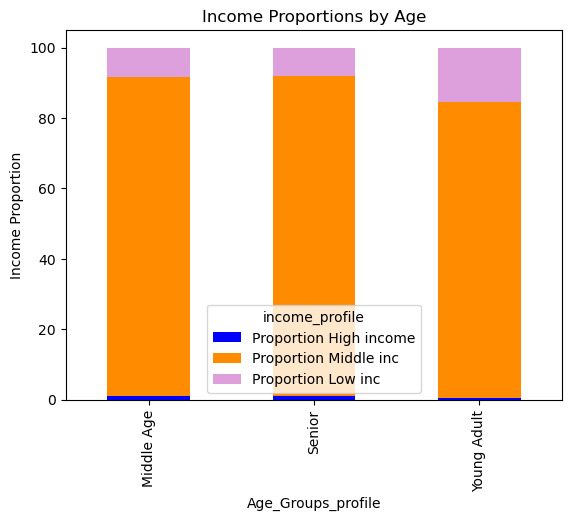

In [44]:
#Create stacked bar chart
income_tiers_bar  = age_income_profile[['Proportion High income', 'Proportion Middle inc', 'Proportion Low inc']].plot.bar(stacked=True, color=["blue", "darkorange", "plum"])
plt.title('Income Proportions by Age')
plt.xlabel
plt.ylabel('Income Proportion')

Text(0, 0.5, 'Income Proportion')

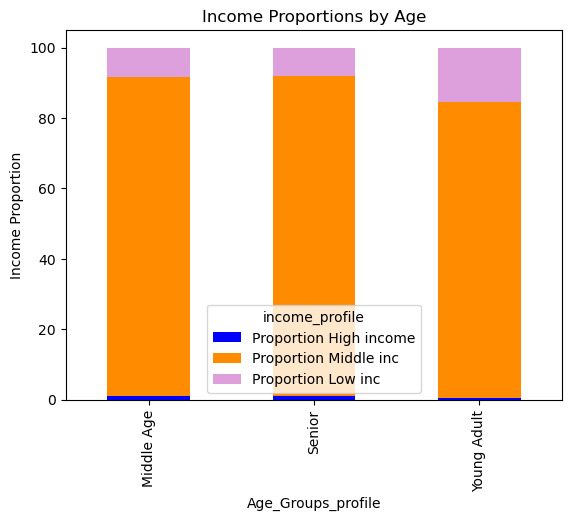

In [45]:
#Save stacked bar chart to Jupyter’s memory
income_tiers_bar  = age_income_profile[['Proportion High income', 'Proportion Middle inc', 'Proportion Low inc']].plot.bar(stacked=True, color=["blue", "darkorange", "plum"])
plt.title('Income Proportions by Age')
plt.xlabel
plt.ylabel('Income Proportion')

In [46]:
income_tiers_bar.figure.tight_layout()

In [47]:
#Export cross_reg_spend_bar chart in the form of an image .png file
income_tiers_bar.figure.savefig(os.path.join(path, '04 Analysis','Visualizations', 'age_income_tiers_bar.png')) 

In [48]:
#Display updated crosstab with proportions
age_income_profile

income_profile,High income,Low income,Middle income,Total,Proportion High income,Proportion Middle inc,Proportion Low inc
Age_Groups_profile,,,,,,,
Middle Age,30910,229269,2494245,2754424,1.122195,90.554141,8.323664
Senior,30301,235226,2604808,2870335,1.055661,90.749268,8.195071
Young Adult,12020,485697,2667771,3165488,0.379720,84.276769,15.343511


In [49]:
small['number_of_dependents'].describe

<bound method NDFrame.describe of 2           3
6           3
8           3
17          3
19          3
           ..
32404820    0
32404839    0
32404845    0
32404846    0
32404851    0
Name: number_of_dependents, Length: 8790247, dtype: int64>

In [50]:
maxClm = small['number_of_dependents'].max()

In [51]:
print(maxClm)

3


In [52]:
"""
File: small_randomized_profile_sample.pkl
Author:Erica Henry
Date: 3/4/24

#Description: Create dependents flag for customers who have dependents.
"""

small['dependents_mean'] = small.groupby(['user_id'])['number_of_dependents'].transform('mean')

C:\Users\HP\AppData\Local\Temp\ipykernel_3056\2464311207.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  small['dependents_mean'] = small.groupby(['user_id'])['number_of_dependents'].transform('mean')


In [53]:
small.loc[small['dependents_mean'] > 0, 'dependent_flag'] = 'With Dependents'

C:\Users\HP\AppData\Local\Temp\ipykernel_3056\3066535579.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  small.loc[small['dependents_mean'] > 0, 'dependent_flag'] = 'With Dependents'


In [54]:
small.loc[small['dependents_mean'] <= 0, 'dependent_flag'] = 'Without Dependents'

In [55]:
small['dependent_flag'].value_counts(dropna = False)

dependent_flag
With Dependents       6592982
Without Dependents    2197265
Name: count, dtype: int64

In [56]:
small['number_of_dependents'].shape

(8790247,)

In [58]:
6592982+2197265

8790247

In [61]:
"""
File: small_sample_profiled.pkl
Author:Erica Henry
Date: 3/9/24

#Description: Create customer_profile variable/column from income tiers and age groups.
"""

small.loc[(small['Age'] <= 40) & (small['income'] > 0) & (small['income'] <= 50000), 'customer_profile'] = 'Low income young adult'

In [62]:
small.loc[(small['Age'] > 40) & (small['Age'] <= 60) & (small['income'] > 50000) & (small['income'] <= 200000), 'customer_profile'] = 'Middle income middle age'

In [63]:
small.loc[(small['Age'] > 60) & (small['Age'] <= 81) & (small['income'] > 200000), 'customer_profile'] = 'High income senior'

In [64]:
small.loc[(small['Age'] <= 40) & (small['income'] > 50000) & (small['income']  <= 200000), 'customer_profile'] = 'Middle income young adult'

In [65]:
small.loc[(small['Age'] > 40) & (small['Age'] <= 60) & (small['income'] > 200000), 'customer_profile'] = 'High income middle age'

In [66]:
small.loc[(small['Age'] > 60) & (small['Age'] <= 81) & (small['income'] > 50000) & (small['income'] <= 200000),'customer_profile'] = 'Middle income senior'

In [67]:
small.loc[(small['Age'] > 60) & (small['Age'] <= 81) & (small['income'] <= 50000), 'customer_profile'] = 'Low income senior'

In [68]:
small.loc[(small['Age'] > 40) & (small['Age'] <= 60) & (small['income'] <= 50000), 'customer_profile'] = 'Low income middle age'

In [69]:
small.loc[(small['Age'] <= 40) & (small['income'] > 200000), 'customer_profile'] = 'High income young adult'

In [70]:
#Print frequency counts of customer_profile column
small['customer_profile'].value_counts(dropna = False)

customer_profile
Middle income young adult    2667771
Middle income senior         2604808
Middle income middle age     2494245
Low income young adult        485697
Low income senior             235226
Low income middle age         229269
High income middle age         30910
High income senior             30301
High income young adult        12020
Name: count, dtype: int64

In [71]:
#Customer_profile variable consists of 9 total customer profiles. 

In [72]:
#Export of small
small.to_pickle(os.path.join(path, '02 Data','Prepared Data', 'small_sample_profiled.pkl'))

In [73]:
"""
File: small_sample_profiled.pkl
Author:Erica Henry
Date: 3/9/24

#Description: Create departments data dictionary to determine top departments.
"""

depts_dictionary = {1: 'frozen', 2: 'other', 3: 'bakery', 4: 'produce', 5: 'alcohol', 6: 'international', 7: 'beverages', 8: 'pets', 9: 'dry goods pasta', 10: 'bulk', 11: 'personal care',
12: 'meat seafood',
13: 'pantry',
14: 'breakfast',
15: 'canned goods',
16: 'dairy eggs',
17: 'household',
18: 'babies',
19: 'snacks',
20: 'deli'}

In [74]:
depts_dictionary

{1: 'frozen',
 2: 'other',
 3: 'bakery',
 4: 'produce',
 5: 'alcohol',
 6: 'international',
 7: 'beverages',
 8: 'pets',
 9: 'dry goods pasta',
 10: 'bulk',
 11: 'personal care',
 12: 'meat seafood',
 13: 'pantry',
 14: 'breakfast',
 15: 'canned goods',
 16: 'dairy eggs',
 17: 'household',
 18: 'babies',
 19: 'snacks',
 20: 'deli'}

In [75]:
#Create new column department_name for data dictionary
small['department_name'] = small['department_id'].map(depts_dictionary).fillna("missing")

C:\Users\HP\AppData\Local\Temp\ipykernel_3056\2676936852.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  small['department_name'] = small['department_id'].map(depts_dictionary).fillna("missing")


In [76]:
#Check output
small.head()

,order_id,user_id,number_of_orders,orders_day_of_week,order_hour_of_day,days_since_prior_order,product_id,add_to_cart_order,number_of_times_reordered,product_name,...,fam_status,income,Region,low_activity_flag,customer_profile,income_profile,Age_Groups_profile,dependents_mean,dependent_flag,department_name
2,473747,1,3,3,12,21.0,196,1,1,Soda,...,married,40423,South,False,Low income young adult,Low income,Young Adult,3.0,With Dependents,beverages
6,550135,1,7,1,9,20.0,196,1,1,Soda,...,married,40423,South,False,Low income young adult,Low income,Young Adult,3.0,With Dependents,beverages
8,2295261,1,9,1,16,0.0,196,4,1,Soda,...,married,40423,South,False,Low income young adult,Low income,Young Adult,3.0,With Dependents,beverages
17,550135,1,7,1,9,20.0,12427,3,1,Original Beef Jerky,...,married,40423,South,False,Low income young adult,Low income,Young Adult,3.0,With Dependents,snacks
19,2295261,1,9,1,16,0.0,12427,6,1,Original Beef Jerky,...,married,40423,South,False,Low income young adult,Low income,Young Adult,3.0,With Dependents,snacks


In [77]:
top_departments = small.groupby('department_name')['number_of_orders'].sum()

In [78]:
top_departments = top_departments.sort_values(ascending=False)

In [79]:
#Create df of top 5 departments
top_5_departments = top_departments.head(5)

In [80]:
top_5_departments

department_name
produce       50282702
dairy eggs    28345637
snacks        14779822
beverages     13740047
frozen        10259151
Name: number_of_orders, dtype: int64

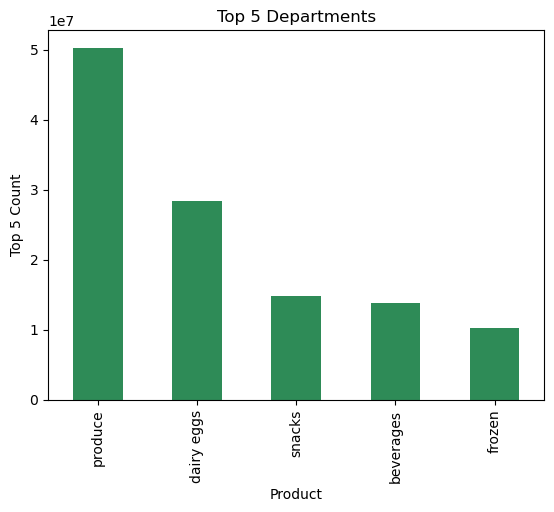

In [81]:
#Plot bar chart of top_5_departments
top_5_departments_bar = top_5_departments.plot.bar(title='Top 5 Departments',
xlabel='Product',
ylabel='Top 5 Count',
color='seagreen') 

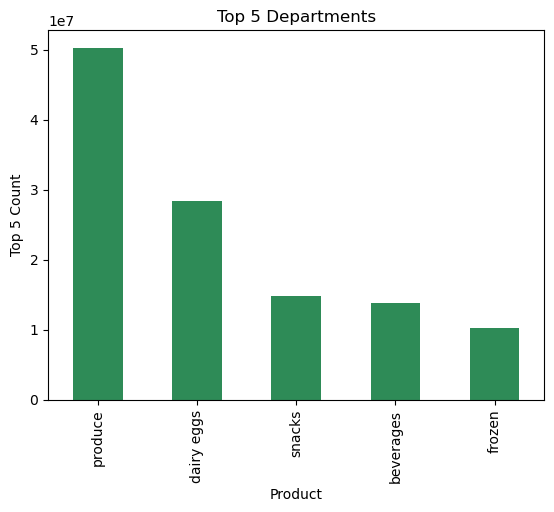

In [82]:
#Save bar chart to Jupyter’s memory 
top_5_departments_bar = top_5_departments.plot.bar(title='Top 5 Departments',
xlabel='Product',
ylabel='Top 5 Count',
color='seagreen') 

In [83]:
top_5_departments_bar.figure.tight_layout()

In [84]:
#Export top_5_departments_bar chart in the form of an image .png file
top_5_departments_bar.figure.savefig(os.path.join(path, '04 Analysis','Visualizations', 'top_5_departments_bar.png')) 

In [85]:
"""
File: small_sample_profiled.pkl
Author:Erica Henry
Date: 3/9/24

#Description: Determine departments preference by customer profile.
"""

profile_depts = small.groupby (['department_name', 'customer_profile']).size().unstack()

In [86]:
profile_depts = profile_depts.sort_values(by = 'Low income young adult', ascending = True)

Text(0, 0.5, 'Number of Orders')

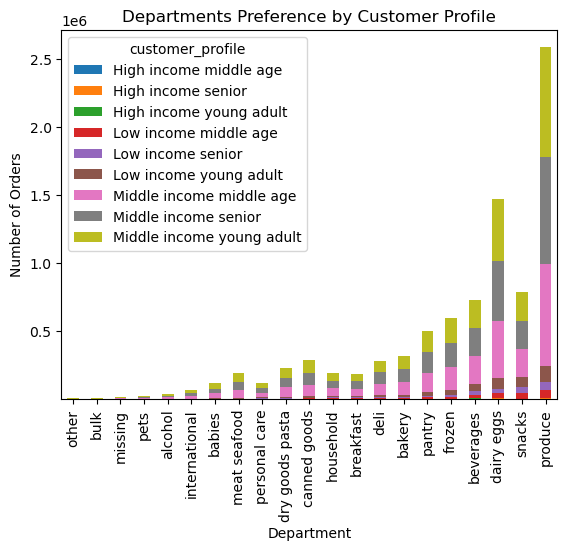

In [87]:
#Plot bar chart of profile_depts
profile_depts = profile_depts.plot(kind='bar', stacked=True)
plt.title('Departments Preference by Customer Profile')
plt.xlabel('Department')
plt.ylabel('Number of Orders')

In [88]:
profile_depts.figure.tight_layout()

In [89]:
#Export profile_depts bar chart in the form of an image .png file
profile_depts.figure.savefig(os.path.join(path, '04 Analysis','Visualizations', 'departments_by_profile.png')) 

In [90]:
"""
File: small_sample_profiled.pkl
Author:Erica Henry
Date: 3/9/24

#Description: Determine departments preference by customer loyalty.
"""

loyalty_by_dept = small.groupby (['department_name', 'loyalty_flag']).size().unstack()

In [91]:
loyalty_by_dept = loyalty_by_dept.sort_values(by = 'Loyal customer', ascending = False)

<function matplotlib.pyplot.ylabel(ylabel, fontdict=None, labelpad=None, *, loc=None, **kwargs)>

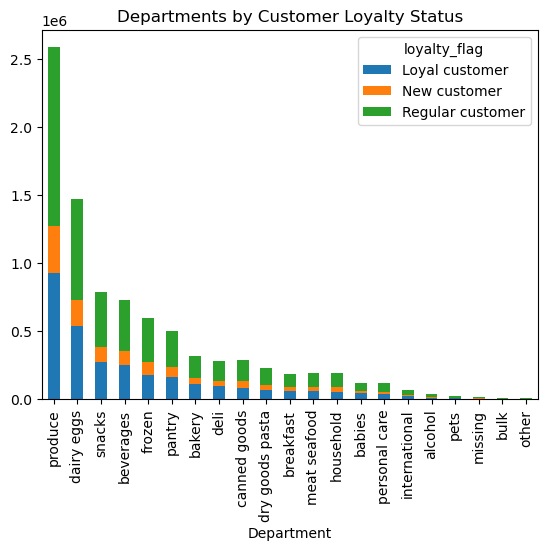

In [92]:
#Plot bar chart of loyalty_by_dept
loyalty_by_dept_bar = loyalty_by_dept.plot(kind='bar', stacked=True)
plt.title('Departments by Customer Loyalty Status')
plt.xlabel ('Department')
plt.ylabel

In [93]:
loyalty_by_dept_bar.figure.tight_layout()

In [94]:
#Export profile_depts bar chart in the form of an image .png file
loyalty_by_dept_bar.figure.savefig(os.path.join(path, '04 Analysis','Visualizations', 'loyalty_by_dept_bar.png')) 

In [95]:
"""
File: small_sample_profiled.pkl
Author:Erica Henry
Date: 3/9/24

#Description: Determine departments preference by region.
"""

dept_by_region = small.groupby (['department_name', 'Region']).size().unstack()

In [96]:
dept_by_region = dept_by_region.sort_values(by = 'West', ascending = False)

Text(0, 0.5, 'Region Frequency')

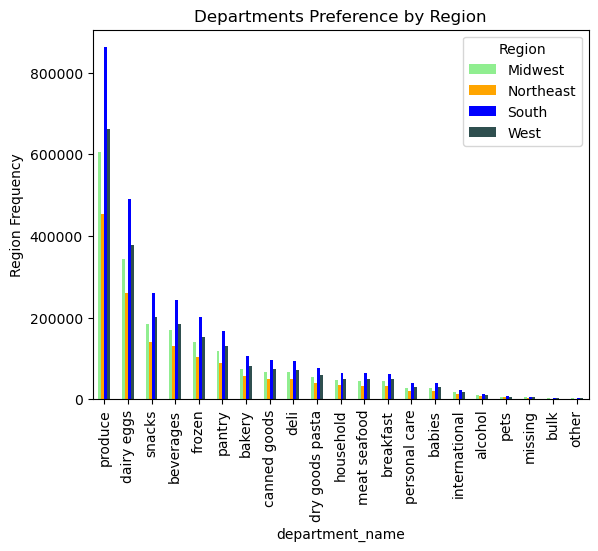

In [97]:
#Plot bar chart of dept_by_region
barplot = dept_by_region.plot.bar(color = ["lightgreen", "orange", "blue", "darkslategrey"])
plt.title('Departments Preference by Region')
plt.xlabel
plt.ylabel('Region Frequency')

Text(0, 0.5, 'Region Frequency')

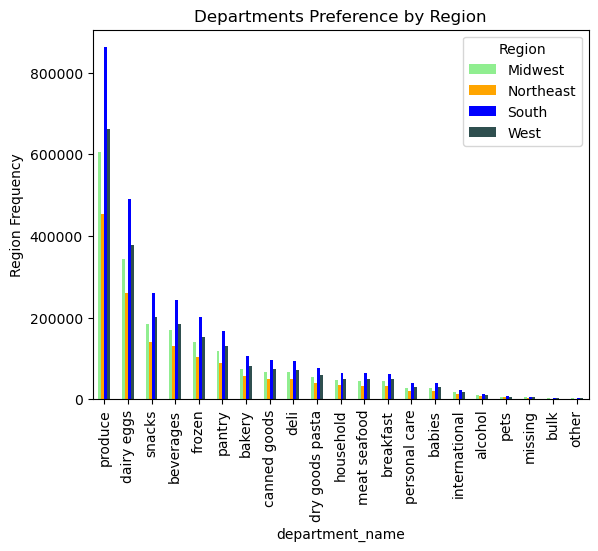

In [98]:
#Save bar chart to Jupyter’s memory
departments_by_region = dept_by_region.plot.bar(color = ["lightgreen", "orange", "blue", "darkslategrey"])
plt.title('Departments Preference by Region')
plt.xlabel
plt.ylabel('Region Frequency')

In [99]:
departments_by_region.figure.tight_layout()

In [100]:
#Export departments_by_region bar chart in the form of an image .png file
departments_by_region.figure.savefig(os.path.join(path, '04 Analysis','Visualizations', 'departments_by_region.png')) 

In [101]:
"""
File: small_sample_profiled.pkl
Author:Erica Henry
Date: 3/9/24

#Description: Determine departments preference by family status.
"""

dept_by_family = small.groupby (['department_name', 'fam_status']).size().unstack()

In [102]:
dept_by_family = dept_by_family.sort_values(by = 'married', ascending = False)

Text(0, 0.5, 'Family Status')

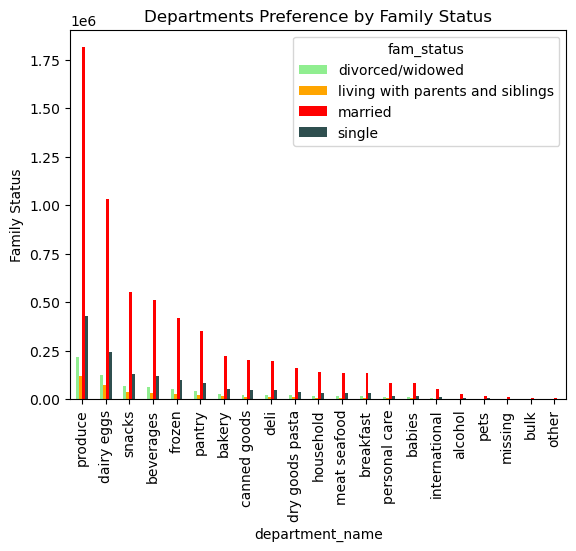

In [103]:
#Plot bar chart of dept_by_family
barplot = dept_by_family.plot.bar(color = ["lightgreen", "orange", "red", "darkslategrey"])
plt.title('Departments Preference by Family Status')
plt.xlabel
plt.ylabel('Family Status')

Text(0, 0.5, 'Family Status')

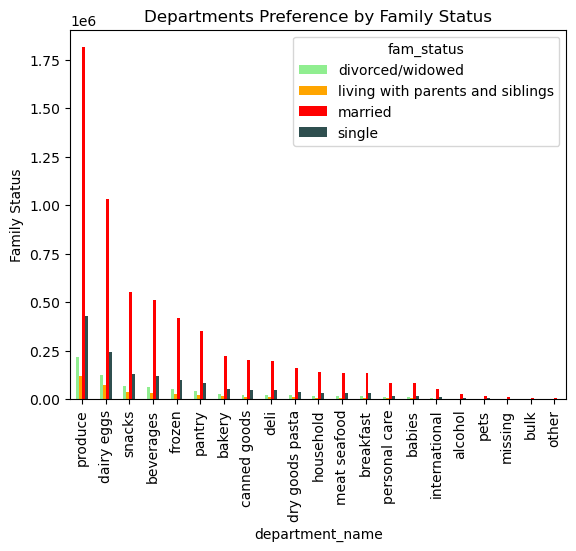

In [104]:
#Save bar chart to Jupyter’s memory
departments_by_famstatus = dept_by_family.plot.bar(color = ["lightgreen", "orange", "red", "darkslategrey"])
plt.title('Departments Preference by Family Status')
plt.xlabel
plt.ylabel('Family Status')

In [105]:
departments_by_famstatus.figure.tight_layout()

In [106]:
#Export departments_by_famstatus bar chart in the form of an image .png file
departments_by_famstatus.figure.savefig(os.path.join(path, '04 Analysis','Visualizations', 'departments_by_family_status.png')) 

In [107]:
#Export of small
small.to_pickle(os.path.join(path, '02 Data','Prepared Data', 'small_sample_profiled.pkl'))